In [2]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

In [3]:
sns.set_style("darkgrid")

# Reading ENSDF Data 

In [4]:
print("Reading data into dataframe...")
df = pd.read_csv("./ENSDF/ensdf_v1.csv")
print("Data read into dataframe!")

# Converting specific columns to datatype 'string'
str_cols = ["Spin", "Parity", "Element_w_A", "Element"]
df[str_cols] = df[str_cols].astype('category')

# Converting remaining columns to numeric type. 
for col in list(df.columns):
    if col not in str_cols:
        df[col] = df[col].astype(float)

# Converting proton, neutron and mass number features to integers
int_cols = ["Level_Number", "Target_Protons", "Target_Neutrons", "Target_Mass_Number"]
df[int_cols] = df[int_cols].astype(int)

basic_cols = ["Level_Number", "Level_Energy", "Target_Protons", "Target_Neutrons", "Atomic_Mass_Micro", "Element_w_A"]
df = df[basic_cols]
df.columns = ["Level_Number", "Level_Energy", "Protons", "Neutrons", "Atomic_Mass_Micro", "Element_w_A"]

Reading data into dataframe...
Data read into dataframe!


In [5]:
df.head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Element_w_A
0,1,0.0,0,1,1.008665e+06,1n
1,1,0.0,1,0,1.007825e+06,1H
2,1,0.0,1,1,2.014102e+06,2H
3,1,0.0,1,2,3.016049e+06,3H
4,1,0.0,2,1,3.016029e+06,3He


In [6]:
print("Reading data into dataframe...")
df2 = pd.read_csv("./ENSDF/ensdf_v2.csv")
print("Data read into dataframe!")

# Converting specific columns to datatype 'string'
str_cols = ["Spin", "Parity", "Element_w_A"]
df2[str_cols] = df2[str_cols].astype('category')

# Converting remaining columns to numeric type. 
for col in list(df2.columns):
    if col not in str_cols:
        df2[col] = df2[col].astype(float)

# Converting proton, neutron and mass number features to integers
int_cols = ["Level_Number", "Target_Protons", "Target_Neutrons"]
df2[int_cols] = df2[int_cols].astype(int)

df2 = df2[basic_cols]
df2.columns = ["Level_Number", "Level_Energy", "Protons", "Neutrons", "Atomic_Mass_Micro", "Element_w_A"]

Reading data into dataframe...
Data read into dataframe!


In [7]:
df2.head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Element_w_A
0,1,0.0,0,1,1.008665e+06,1n
1,1,0.0,1,0,1.007825e+06,1H
2,1,0.0,1,1,2.014102e+06,2H
3,1,0.0,1,2,3.016049e+06,3H
4,1,0.0,2,1,3.016029e+06,3He


In [8]:
df["Level_Energy"] = df.Level_Energy.replace(to_replace=-1.0, value=0)

# Exploratory Data Analysis

Let us study the dataset and analyze the distributions.

In [9]:
# Specifying directory to save figures
figure_dir = "./Figures/ENSDF/"

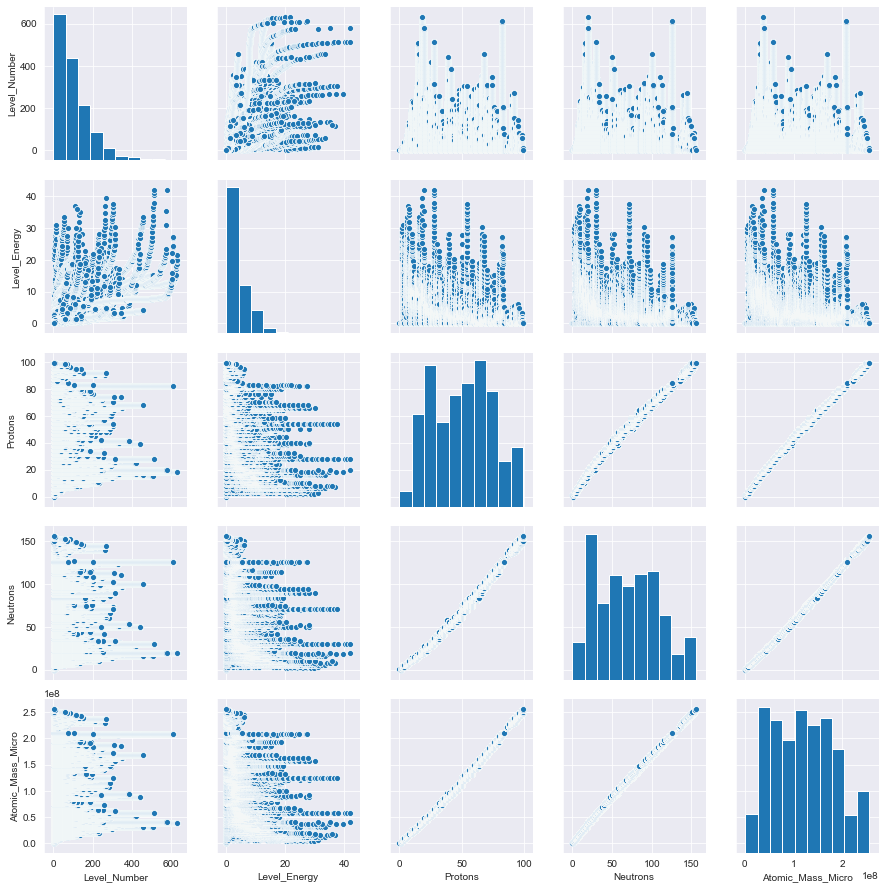

In [18]:
sns.pairplot(df)
plt.savefig(figure_dir + 'ENSDF_Pairplot.png', transparent=False)

# Isotope Energy Distribution

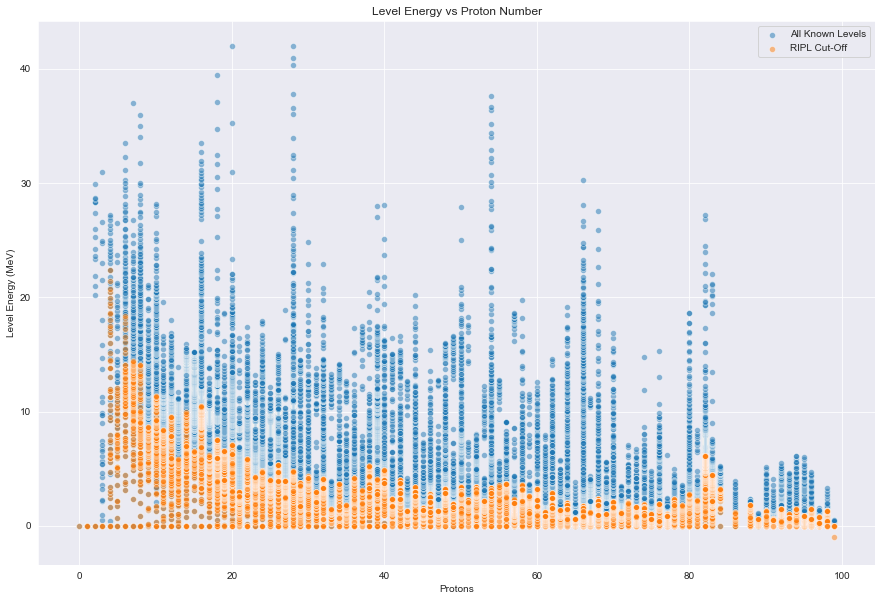

In [19]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Protons"], df["Level_Energy"], alpha=0.5, label="All Known Levels")
sns.scatterplot(df2.Protons, df2.Level_Energy, alpha=0.5, label="RIPL Cut-Off")
plt.ylabel("Level Energy (MeV)")
plt.title("Level Energy vs Proton Number")
plt.savefig(figure_dir + 'ENSDF_Z_E.png', transparent=False, bbox_inches='tight')

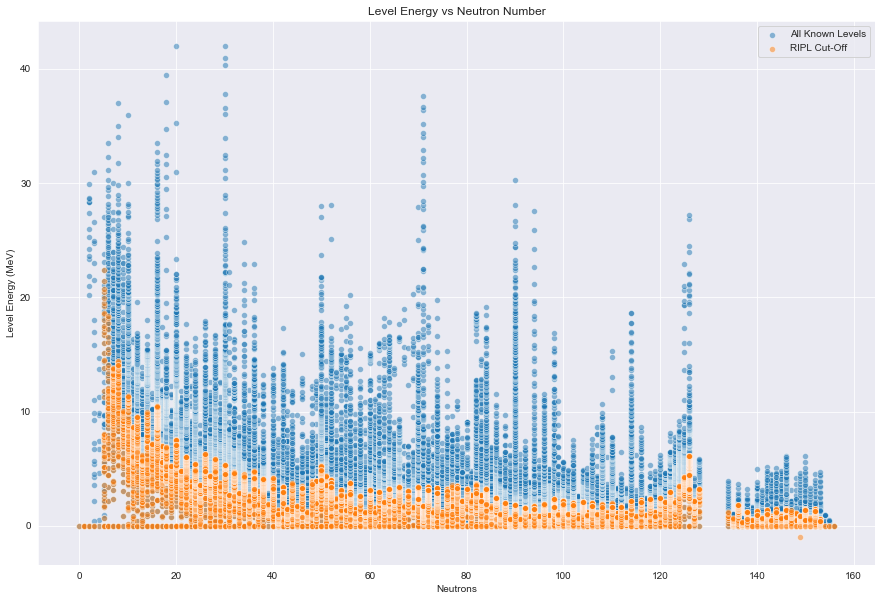

In [20]:
plt.figure(figsize=(15,10))
sns.scatterplot(df["Neutrons"], df["Level_Energy"], alpha=0.5, label="All Known Levels")
sns.scatterplot(df2.Neutrons, df2.Level_Energy, alpha=0.5, label="RIPL Cut-Off")
plt.ylabel("Level Energy (MeV)")
plt.title("Level Energy vs Neutron Number")
plt.savefig(figure_dir + 'ENSDF_N_E.png', transparent=False)

# Isotopes Statistics


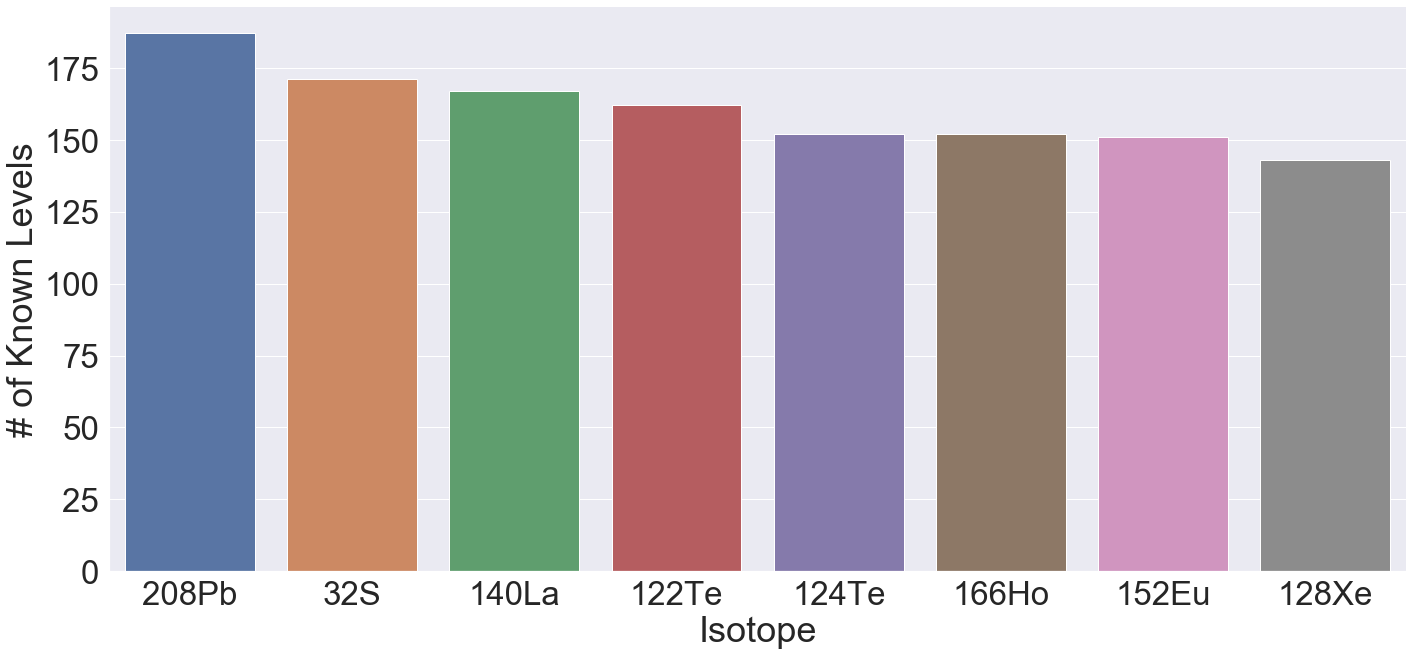

In [24]:
cat_cols_plot = ["Element_w_A"]
for i in cat_cols_plot:
    sns.set(font_scale = 3)
    sns.catplot(x=i, kind="count", data=df2, 
            order=df2[i].value_counts().iloc[:8].index, 
            palette="deep", height=10, aspect=2);
    plt.xlabel("Isotope")
    plt.ylabel("# of Known Levels")
    plt.savefig(figure_dir + 'ENSDF_{}.png'.format(i))

In [25]:
df["Mass_Number"] = df.Protons + df.Neutrons

In [26]:
sns.set(font_scale = 2)

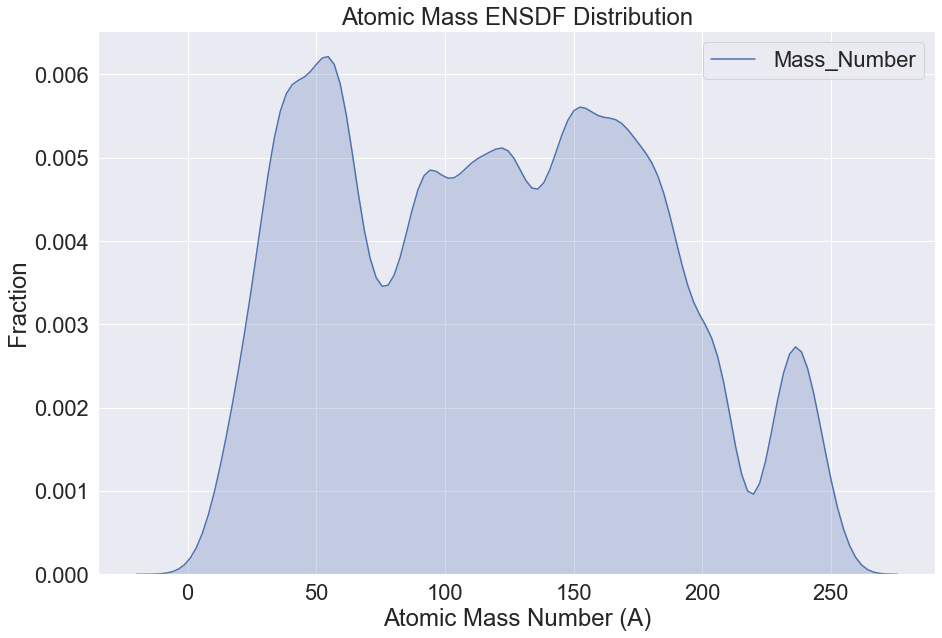

In [28]:
plt.figure(figsize=(15,10))
g = sns.kdeplot(df.Mass_Number, shade=True);
g.set(xlabel="Atomic Mass Number (A)", ylabel="Fraction")
plt.title("Atomic Mass ENSDF Distribution")
plt.savefig(figure_dir + 'ENSDF_Atomic_Mass_Dist.png', bbox_inches='tight')

# Energy Distribution

In [29]:
sns.set(font_scale=2)

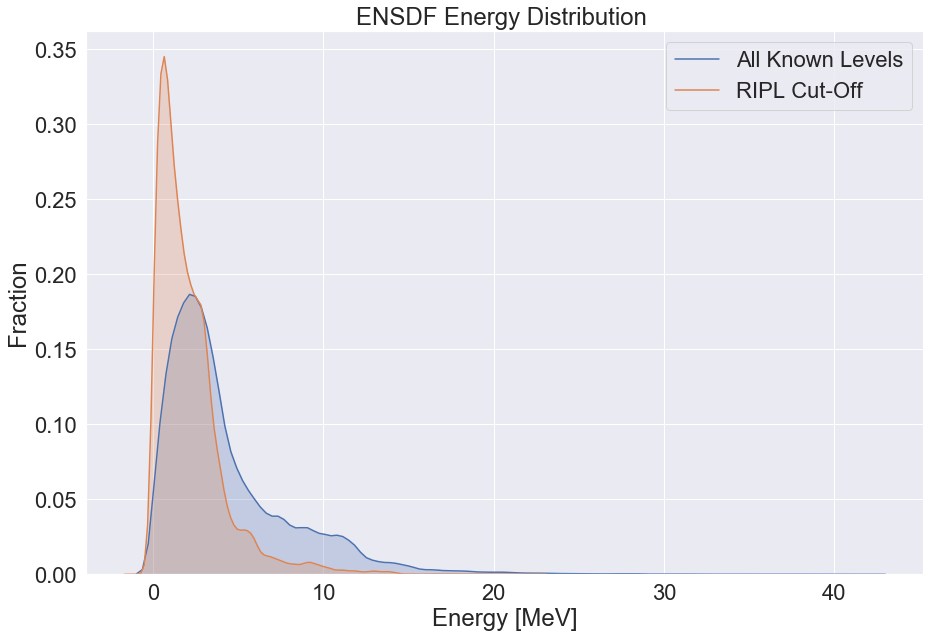

In [30]:
plt.figure(figsize=(15,10))
sns.kdeplot(df.Level_Energy.values, shade=True, label="All Known Levels");
sns.kdeplot(df2.Level_Energy.values, shade=True, label='RIPL Cut-Off');
plt.xlabel("Energy [MeV]")
plt.ylabel("Fraction")
plt.title("ENSDF Energy Distribution ")
plt.savefig(figure_dir + 'ENSDF_E_Dist.png', bbox_inches='tight')

# Level Distribution

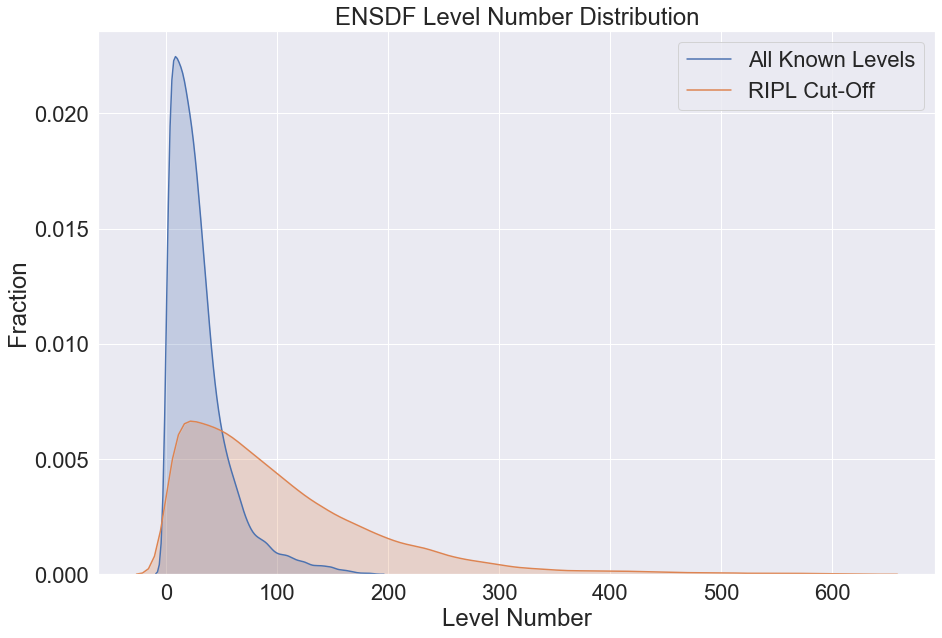

In [31]:
plt.figure(figsize=(15,10))
sns.kdeplot(df2.Level_Number.values, shade=True, label="All Known Levels");
sns.kdeplot(df.Level_Number.values, shade=True, label="RIPL Cut-Off");
plt.xlabel("Level Number")
plt.ylabel("Fraction")
plt.title("ENSDF Level Number Distribution")
plt.savefig(figure_dir + 'ENSDF_L_Dist.png', bbox_inches='tight')

# Energy vs Level Number

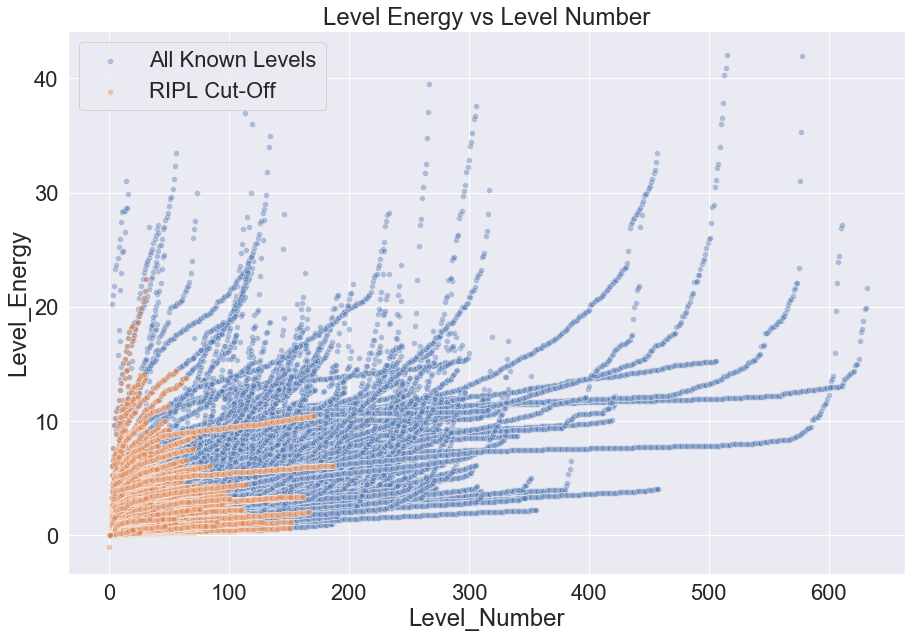

In [46]:
plt.figure(figsize=(15,10))
sns.scatterplot(x='Level_Number', y='Level_Energy', data=df, alpha=0.4, label="All Known Levels")
sns.scatterplot(x='Level_Number', y='Level_Energy', data=df2, alpha=0.4, label="RIPL Cut-Off")
plt.title("Level Energy vs Level Number")
plt.savefig(figure_dir + 'ENSDF_E_vs_L.png', bbox_inches='tight')

In [42]:
# # plt.figure(figsize=(15,10))
# sns.jointplot(x='Level_Number', y='Level_Energy', data=df, height=15, alpha=0.3)
# #plt.savefig(figure_dir + 'ENSDF_E_vs_L.png', bbox_inches='tight')

In [45]:
# sns.jointplot(x='Level_Number', y='Level_Energy', data=df2, height=15, alpha=0.5)
# plt.savefig(figure_dir + 'ENSDF_E_vs_L_Cut.png', bbox_inches='tight')

# Iron and Chlorine Energy Distribution

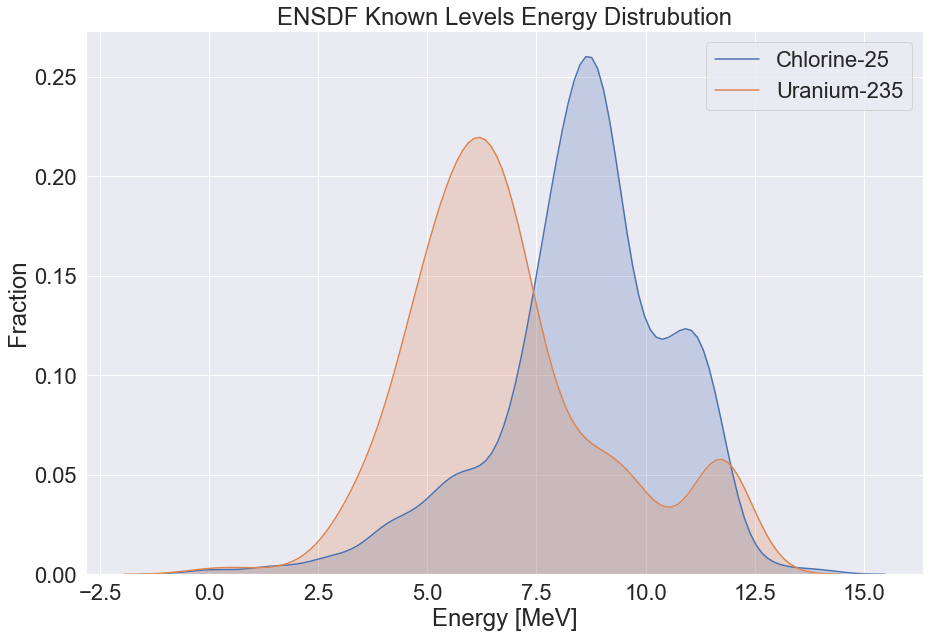

In [51]:
plt.figure(figsize=(15,10))
chlorine = df[df.Element_w_A == "35Cl"]
uranium = df[df.Element_w_A == "235U"]
sns.kdeplot(chlorine.Level_Energy.values, shade=True, label="Chlorine-25");
sns.kdeplot(iron.Level_Energy.values, shade=True, label='Uranium-235');
plt.xlabel("Energy [MeV]")
plt.ylabel("Fraction")
plt.title("ENSDF Known Levels Energy Distrubution")
plt.savefig(figure_dir + 'ENSDF_Cl_U_E_Dist.png', bbox_inches='tight')

# Plotting Utilities: Level and Level Density

In [52]:
sns.set(font_scale=2)

In [90]:
def plot_levels_axh(protons, neutrons, df, save=False):
    to_plot = df[(df["Protons"] == protons) & (df["Neutrons"] == neutrons)].sort_values(
        by='Level_Number', ascending=False)
    plt.figure(figsize=(10,15))
    for i in to_plot["Level_Energy"].values:
        plt.axhline(i, c="r", alpha=0.7)
    plt.title('{} Protons, {} Neutrons'.format(protons, neutrons))
    plt.ylabel('Energy (MeV)')
    plt.xticks([], [])
    if save == True:
        plt.savefig(figure_dir + 'ENSDF_{}_AXH_Level_Density.png'.format(to_plot.Element_w_A.iloc[0]), bbox_inches='tight')
    
def plot_levels_sctr(protons, neutrons, df, df2=pd.DataFrame(), save=False):
    to_plot = df[(df["Protons"] == protons) & (df["Neutrons"] == neutrons)].sort_values(
        by='Level_Number', ascending=False)
    plt.figure(figsize=(15,10))
    sns.scatterplot(to_plot["Level_Number"], to_plot["Level_Energy"], alpha=0.5, label="All Known Levels")
    if df2.shape[0] != 0:
        to_plot_2 = df2[(df2["Protons"] == protons) & (df2["Neutrons"] == neutrons)].sort_values(
            by='Level_Number', ascending=True)
        sns.scatterplot(to_plot_2["Level_Number"], to_plot_2["Level_Energy"], alpha=0.5, label="RIPL Cut-Off")
    plt.title('Energy vs Level Number: {} Protons, {} Neutrons'.format(protons, neutrons))
    plt.legend()
    plt.xlabel("Level Number")
    plt.ylabel('Energy (MeV)')
    if save == True:
        plt.savefig(figure_dir + 'ENSDF_{}_Level_vs_Number.png'.format(to_plot.Element_w_A.iloc[0]), bbox_inches='tight')
        
        
    
def plot_level_density(protons, neutrons, df, df2=pd.DataFrame(), save=False):
    to_plot = df[(df["Protons"] == protons) & (df["Neutrons"] == neutrons)].sort_values(
        by='Level_Number', ascending=True)
    plt.figure(figsize=(15,10))
    to_plot["N"] = np.cumsum(to_plot.Level_Number)
    plt.plot(to_plot.Level_Energy, to_plot.N, c='blue', label="All Known Levels")
    if df2.shape[0] != 0:
        to_plot_2 = df2[(df2["Protons"] == protons) & (df2["Neutrons"] == neutrons)].sort_values(
            by='Level_Number', ascending=True)
        to_plot_2["N"] = np.cumsum(to_plot_2.Level_Number)
        plt.plot(to_plot_2.Level_Energy, to_plot_2.N, c='green', label="RIPL Cut-Off")
    plt.yscale('log')
    plt.title("{} Level Density".format(to_plot.Element_w_A.iloc[0]))
    plt.ylabel("N (Number of Levels)")
    plt.legend()
    plt.xlabel("Energy (MeV)")
    if save == True:
        plt.savefig(figure_dir + 'ENSDF_{}_Level_Density.png'.format(to_plot.Element_w_A.iloc[0]), bbox_inches='tight')

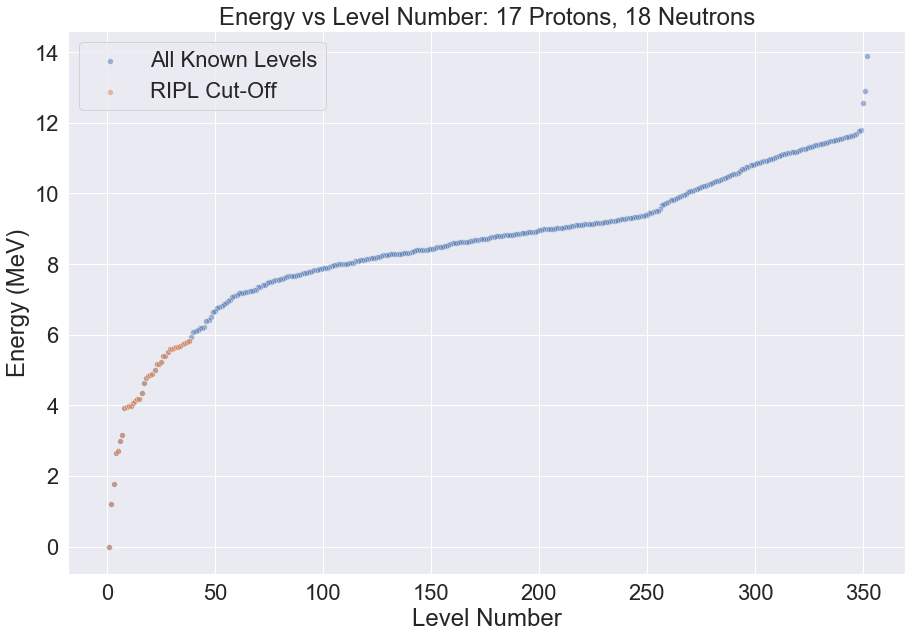

In [91]:
plot_levels_sctr(17, 35-17, df, df2, save=True)

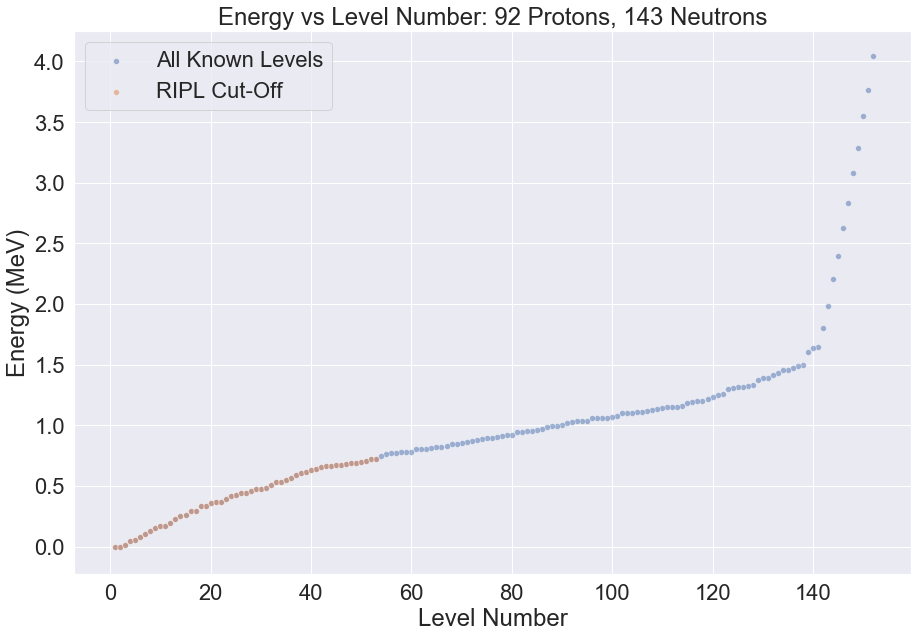

In [92]:
plot_levels_sctr(92, 235-92, df, df2, save=False)

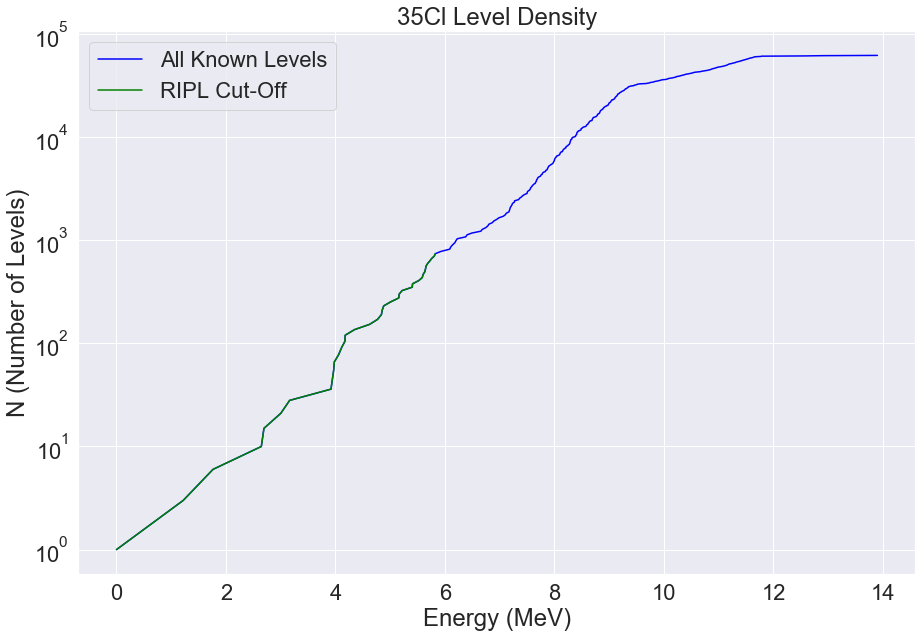

In [93]:
plot_level_density(17, 35-17, df, df2, save=True)

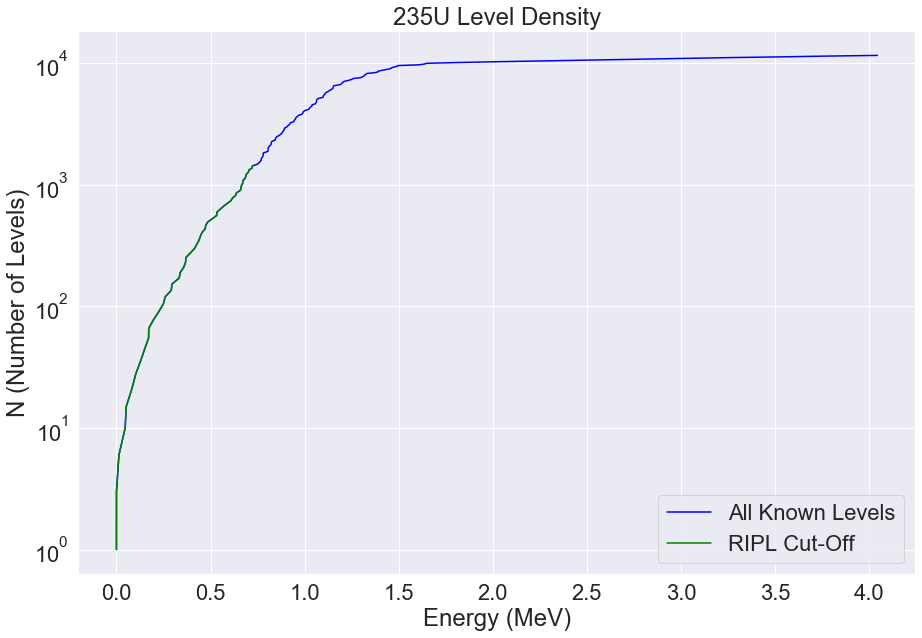

In [94]:
plot_level_density(92, 235-92, df, df2, save=True)

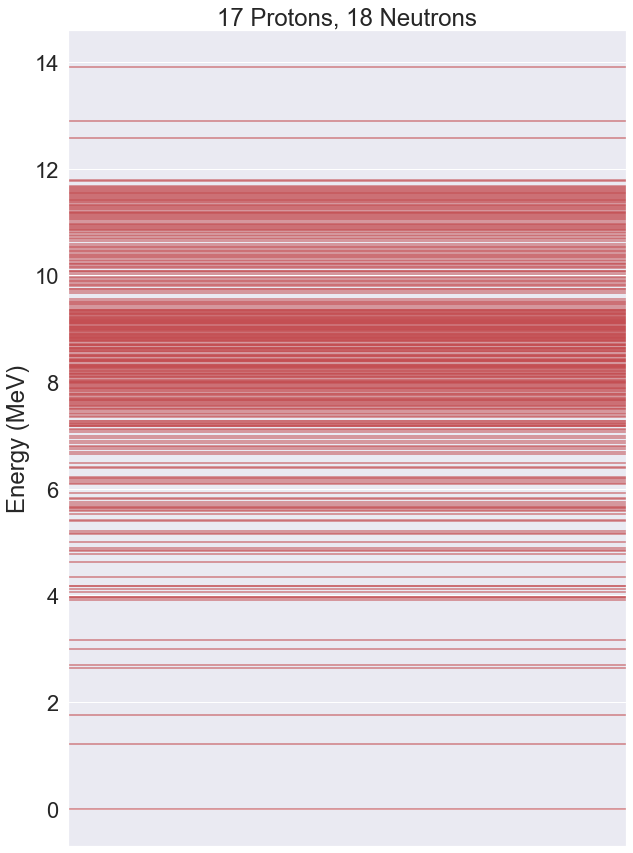

In [62]:
plot_levels_axh(17, 35-17, df, save=False)

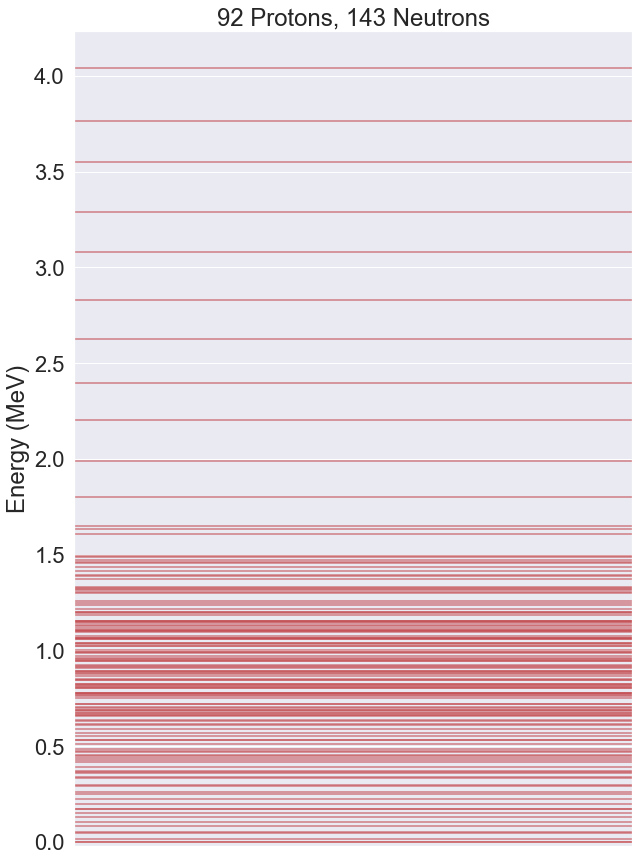

In [63]:
plot_levels_axh(92, 235-92, df, save=False)

# Numerical Features

Lets follow up with the Chlorine-35 (n,p) example.

We can explor correlation among features but as we know beforehand, cross section do not behave linearly. Let us use the chlorine 35 n,p cross sections as an example.

<b>P-value</b>: 
<p>What is this P-value? The P-value is the probability value that the correlation between these two variables is statistically significant. Normally, we choose a significance level of 0.05, which means that we are 95% confident that the correlation between the variables is significant.</p>

By convention, when the
<ul>
    <li>p-value is $<$ 0.001: we say there is strong evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.05: there is moderate evidence that the correlation is significant.</li>
    <li>the p-value is $<$ 0.1: there is weak evidence that the correlation is significant.</li>
    <li>the p-value is $>$ 0.1: there is no evidence that the correlation is significant.</li>
</ul>

In [71]:
from scipy import stats

In [70]:
def pearson_corr(protons, neutrons, df):
    to_plot = df[(df["Protons"] == protons) & (df["Neutrons"] == neutrons)].sort_values(
        by='Level_Number', ascending=True)
    pearson_coef, p_value = stats.pearsonr(to_plot['Level_Number'], to_plot['Level_Energy'])
    print("Results for {}:".format(to_plot.Element_w_A.iloc[0]))
    print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

In [65]:
chlorine = df[df.Element_w_A == "35Cl"].sort_values(by='Level_Number', ascending=True)
uranium = df[df.Element_w_A == "235U"].sort_values(by='Level_Number', ascending=True)

In [66]:
chlorine.describe()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
count,352.000000,352.000000,352.0,352.0,352.0,352.0
mean,176.500000,8.579085,17.0,18.0,35453000.0,35.0
std,101.757883,2.029201,0.0,0.0,0.0,0.0
min,1.000000,0.000000,17.0,18.0,35453000.0,35.0
25%,88.750000,7.691525,17.0,18.0,35453000.0,35.0
50%,176.500000,8.734000,17.0,18.0,35453000.0,35.0
75%,264.250000,9.877750,17.0,18.0,35453000.0,35.0
max,352.000000,13.900000,17.0,18.0,35453000.0,35.0


In [68]:
pd.DataFrame(chlorine.corr()).sort_values(by='Level_Energy', ascending=False).head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
Level_Energy,0.939196,1.000000,NaN,NaN,NaN,NaN
Level_Number,1.000000,0.939196,NaN,NaN,NaN,NaN
Protons,NaN,NaN,NaN,NaN,NaN,NaN
Neutrons,NaN,NaN,NaN,NaN,NaN,NaN
Atomic_Mass_Micro,NaN,NaN,NaN,NaN,NaN,NaN


In [74]:
pearson_corr(17, 35-17, df2)

Results for 35Cl:
The Pearson Correlation Coefficient is 0.9020790472746514  with a P-value of P = 1.0588253532475289e-14


In [67]:
uranium.describe()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
count,152.000000,152.000000,152.0,152.0,1.520000e+02,152.0
mean,76.500000,0.981113,92.0,143.0,2.350439e+08,235.0
std,44.022721,0.678888,0.0,0.0,2.990084e-08,0.0
min,1.000000,0.000000,92.0,143.0,2.350439e+08,235.0
25%,38.750000,0.614320,92.0,143.0,2.350439e+08,235.0
50%,76.500000,0.898620,92.0,143.0,2.350439e+08,235.0
75%,114.250000,1.162983,92.0,143.0,2.350439e+08,235.0
max,152.000000,4.043000,92.0,143.0,2.350439e+08,235.0


In [69]:
pd.DataFrame(uranium.corr()).sort_values(by='Level_Energy', ascending=False).head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Mass_Number
Level_Energy,0.848441,1.000000e+00,NaN,NaN,-3.626947e-16,NaN
Level_Number,1.000000,8.484415e-01,NaN,NaN,0.000000e+00,NaN
Atomic_Mass_Micro,0.000000,-3.626947e-16,NaN,NaN,1.000000e+00,NaN
Protons,NaN,NaN,NaN,NaN,NaN,NaN
Neutrons,NaN,NaN,NaN,NaN,NaN,NaN


In [73]:
pearson_corr(92, 235-92, df2)

Results for 235U:
The Pearson Correlation Coefficient is 0.9892727082915095  with a P-value of P = 2.784416965803747e-44


The energy is weakley linearly correlated. The p-value results in 1% confidence that this correlation is significant. We therefore expect that a linear model will work poorly in this data. As a nuclear engineer, we know that there are depedences on Energy depending on the region. One solution could be to split the data into the appropiate energy ranges but that would defeat the purpose of this project.

In [75]:
num_columns = []
for col in list(df.columns):
    if col not in str_cols:
        num_columns.append(col)

We can see that several features are extremeley negatively skewed. This introduces problems to almost all ML algorithms as we shall demonstrate in the next notebook. 

In [76]:
from scipy.stats import skew

- skewness = 0 : normally distributed.
- skewness > 0 : more weight in the left tail of the distribution.
- skewness < 0 : more weight in the right tail of the distribution.

In [77]:
case_list = {}

for col in num_columns:
    skewness = skew(df[col].values)
    case = {col: skewness}
    case_list.update(case)
    
skew_df = pd.Series(case_list).to_frame().reset_index()
skew_df.columns = ["Column_Name", "Skewness"]
skew_df = skew_df.sort_values(by=["Skewness"], ascending=False)

In [78]:
skew_df

,Column_Name,Skewness
1,Level_Energy,2.021616
0,Level_Number,1.717577
3,Neutrons,0.228353
4,Atomic_Mass_Micro,0.162351
5,Mass_Number,0.160456
2,Protons,0.047638


In [79]:
skewed_cols = ["Level_Number", "Level_Energy"]

In [320]:
energy_log = np.sqrt(df["Level_Energy"].values)
level_log = np.sqrt(df["Level_Number"].values)

In [329]:
sns.set(font_scale=1)

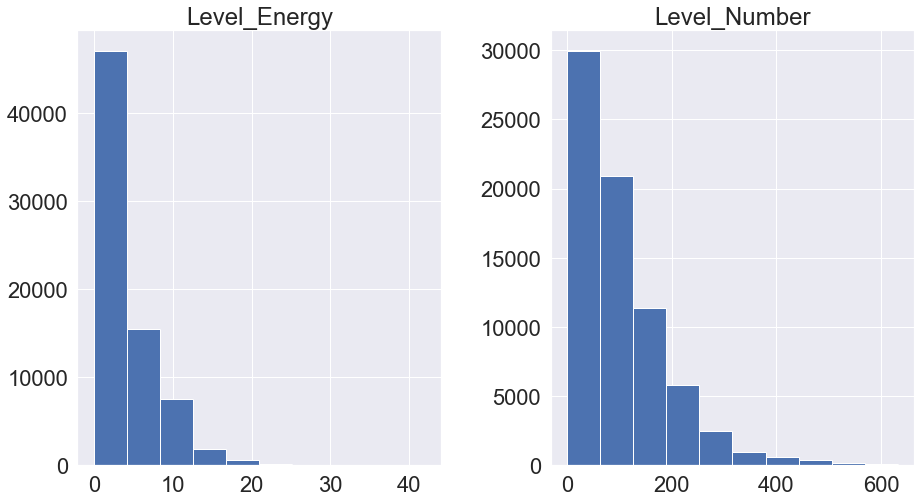

In [385]:
df[["Level_Energy", "Level_Number"]].hist(figsize=(15,8))
plt.savefig(figure_dir + 'ENSDF_Pre_Log_Energy_Levels.png', bbox_inches='tight')

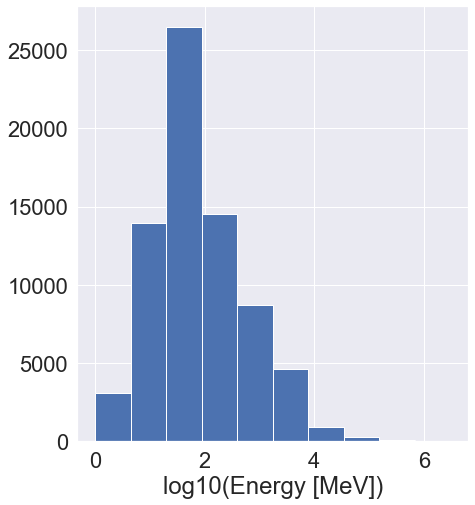

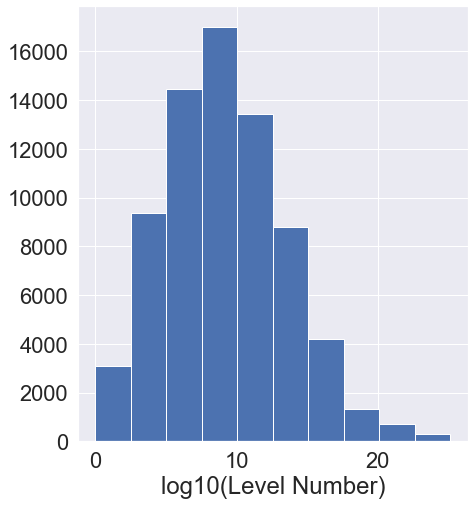

In [386]:
plt.figure(figsize=(7,8))
plt.hist(energy_log)
plt.xlabel("log10(Energy [MeV])")
plt.savefig(figure_dir + 'ENSDF_Log_Energy.png', bbox_inches='tight')
plt.figure(figsize=(7,8))
plt.hist(level_log)
plt.xlabel("log10(Level Number)")
plt.savefig(figure_dir + 'ENSDF_Log_Levels.png', bbox_inches='tight')

In [323]:
df["Level_Energy_SQRT"] = df.Level_Energy.apply(lambda x: np.sqrt(x))
df["Level_Number_SQRT"] = df.Level_Number.apply(lambda x: np.sqrt(x)) 
df2["Level_Energy_SQRT"] = df2.Level_Energy.apply(lambda x: np.sqrt(x))
df2["Level_Number_SQRT"] = df2.Level_Number.apply(lambda x: np.sqrt(x)) 

In [324]:
df.head()

,Level_Number,Level_Energy,Protons,Neutrons,Atomic_Mass_Micro,Element_w_A,Level_Energy_SQRT,Level_Number_SQRT
0,1,0.0,0,1,1.008665e+06,1n,0.0,1.0
1,1,0.0,1,0,1.007825e+06,1H,0.0,1.0
2,1,0.0,1,1,2.014102e+06,2H,0.0,1.0
3,1,0.0,1,2,3.016049e+06,3H,0.0,1.0
4,1,0.0,2,1,3.016029e+06,3He,0.0,1.0


In [325]:
df.to_csv("./ENSDF/ensdf_v1_2.csv", index=False)
df2.to_csv("./ENSDF/ensdf_v2_2.csv", index=False)